Arquivos do curso: https://github.com/alura-cursos/introducao-a-data-science/archive/aula0.zip

Datasets: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?resource=download

### Importação da biblioteca Pandas

In [48]:
import pandas as pd

### Análise Exploratória

#### Analisando as notas em geral

In [49]:
notas = pd.read_csv('ml-latest-small/ratings.csv')

In [50]:
#Mostra as 5 primeiras linhas
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [51]:
# Mostra o nome das colunas
notas.columns
# Renomenando as colunas
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
#Mostra as 5 primeiras linhas
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [52]:
# Dimensão do dataframe
notas.shape

(100836, 4)

In [54]:
#Realizando a contagem de valores pela coluna 'nota'
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [55]:
#Imprimindo a média e a mediana das notas
print('Média:', notas['nota'].mean())
print('Mediana:', notas['nota'].median())

Média: 3.501556983616962
Mediana: 3.5


<AxesSubplot: ylabel='Frequency'>

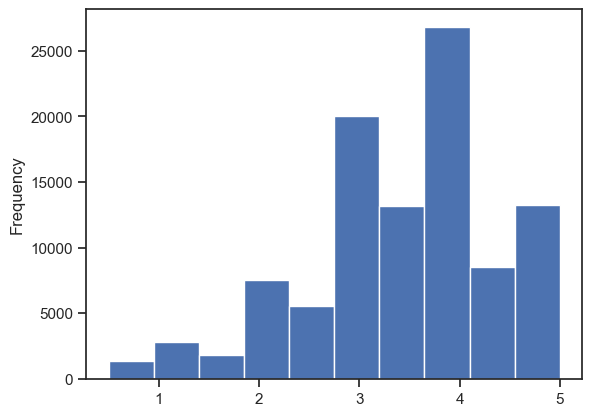

In [56]:
#Mostra o histograma da coluna Nota
notas['nota'].plot(kind = 'hist')

In [57]:
#Descrição estatística da coluna nota
notas['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

### Data visualization

#### Importação da biblioteca Seaborn

In [58]:
import seaborn as sns

<AxesSubplot: >

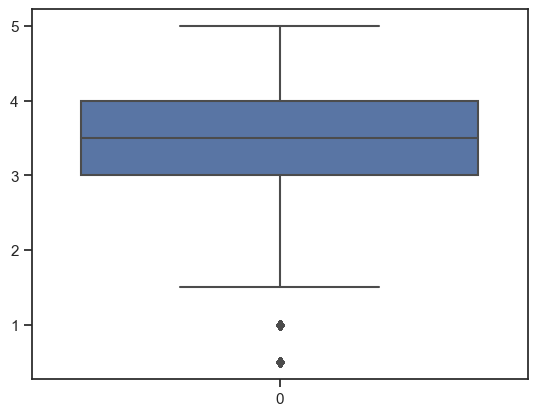

In [59]:
#Mostra o boxplot referente á coluna nota
sns.boxplot(notas['nota'])

In [60]:
filmes = pd.read_csv('ml-latest-small\movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Analisando algumas notas específicas por filme

In [61]:
#Media da nota de Toy Story
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [64]:
#Media da nota de Jumanji
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [66]:
#Agrupando os filmes pela nota média
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot: xlabel='nota'>

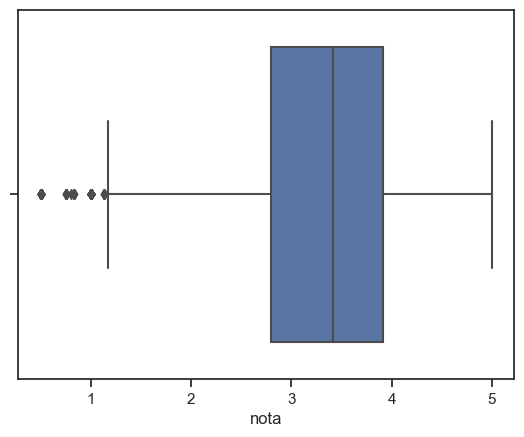

In [68]:
#Mostrando boxplot com a média geral dos filmes
sns.boxplot(x = medias_por_filme)

C:\Users\Willy\AppData\Local\Temp\ipykernel_62216\884807421.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme)


<AxesSubplot: xlabel='nota', ylabel='Density'>

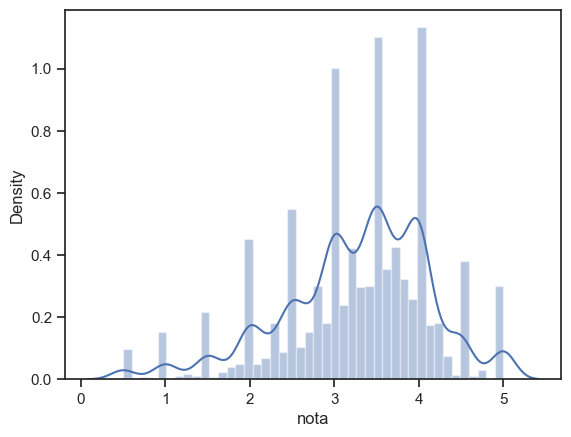

In [69]:
sns.distplot(medias_por_filme)

In [70]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma das médias dos filmes')

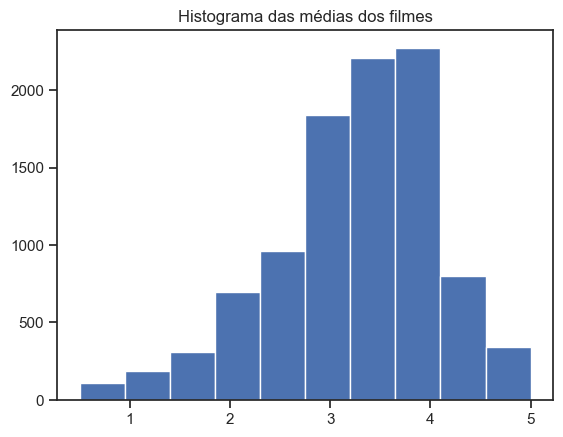

In [71]:
#Mostra o histograma da média dos filmes
plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')

_____

In [72]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [73]:
#Mostra o idioma dos filmes (distinct)
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [23]:
#Realiza a contagem de filmes por idioma
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [74]:
#índices
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [75]:
#série - valores
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

In [76]:
#transformar em dataframe
tmdb['original_language'].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [77]:
#retirando o índice e criando duas colunas (transformando o índice em coluna)
tmdb['original_language'].value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [78]:
#criando novo dataframe com a contagem dos filmes por idioma
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot: xlabel='original_language', ylabel='total'>

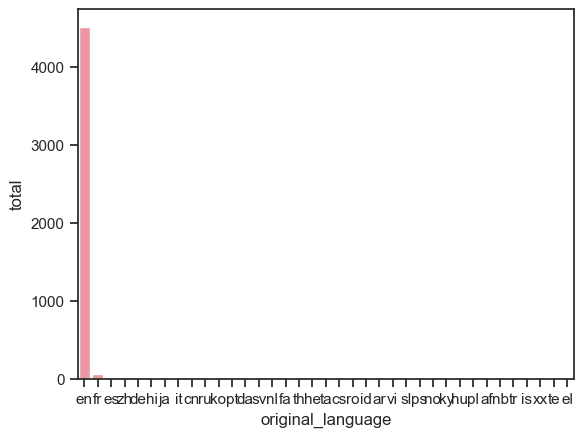

In [79]:
#criando gráfico dos filmes por idioma
sns.barplot(x='original_language', y='total', data = contagem_de_lingua)

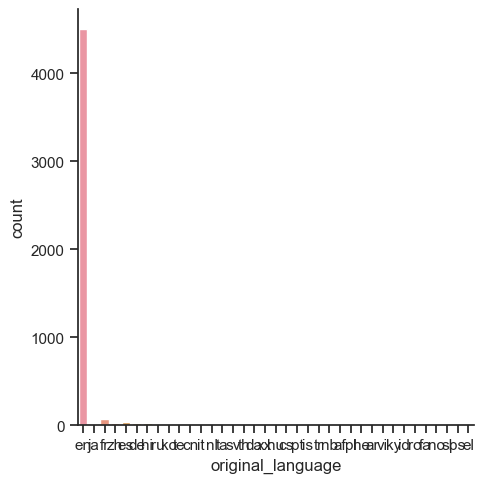

In [80]:
#plotando gráfico sem necessidade de tantos tratamentos com catplot (categoria)
sns.catplot(x = 'original_language', data = tmdb, kind = 'count')

([<matplotlib.patches.Wedge at 0x1debd950950>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

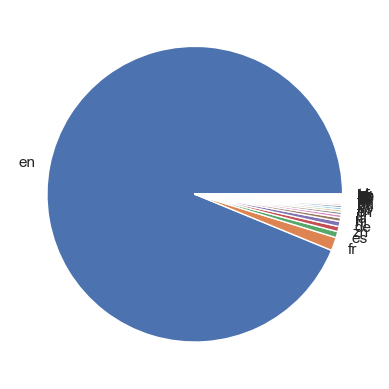

In [81]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

In [82]:
#somando todas as outras as línguas para comparar com inglês
total_por_lingua = tmdb['original_language'].value_counts()
total_por_lingua #4505 inglês e x outros

total_geral = total_por_lingua.sum()
total_geral #4803 no total

total_de_ingles = total_por_lingua.loc['en']
total_de_ingles #4505 inglês

total_do_resto = total_geral - total_de_ingles
total_do_resto #298 outros

print(total_de_ingles, total_do_resto)

4505 298


In [83]:
#criando um dicionário com as informações
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}

dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [84]:
#criando um dataframe com base nos dados do dicionário criado
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot: xlabel='lingua', ylabel='total'>

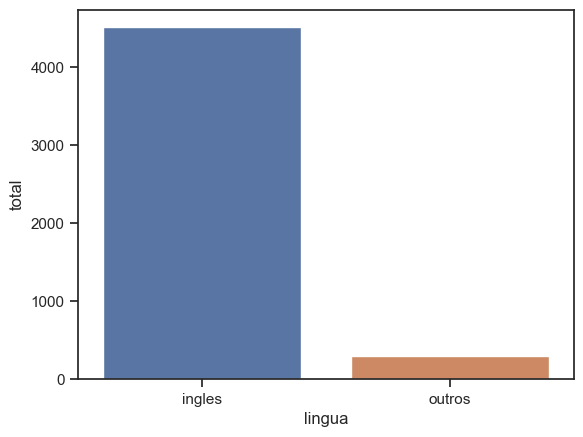

In [85]:
#criando gráfico com o dataframe
sns.barplot(x='lingua', y='total', data= dados)

In [86]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

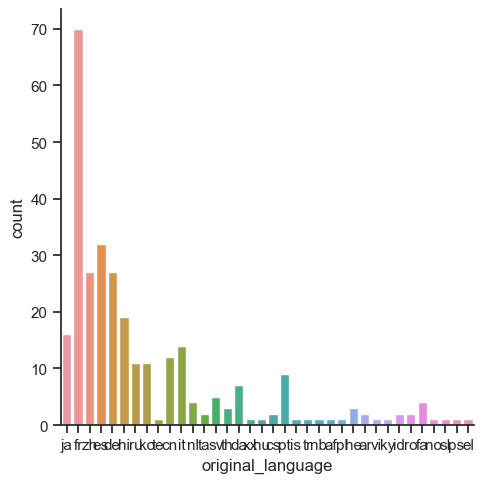

In [88]:
#Criando dataframe com as linhas onde a língua original não é inglês
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
#catplot
sns.catplot(
    x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles)

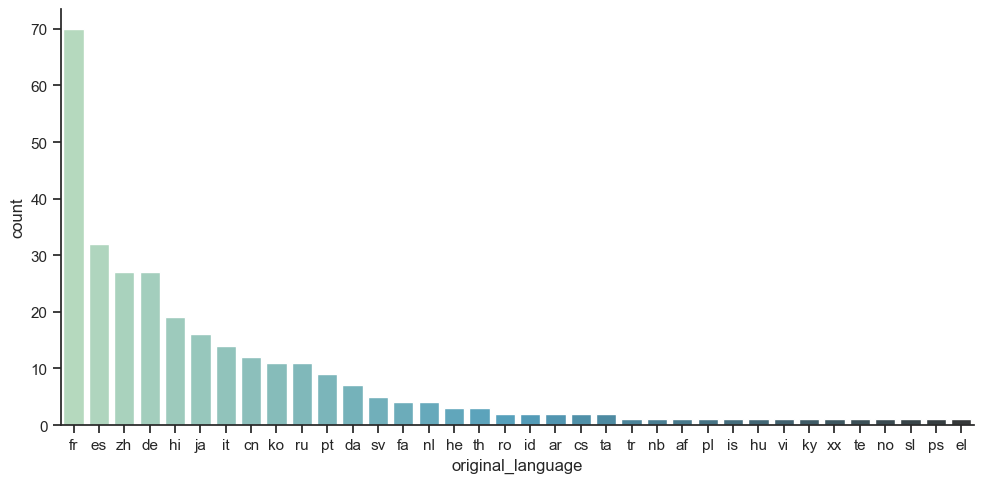

In [89]:
#catplot
sns.catplot(
    x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles,
    aspect = 2,
    palette = 'GnBu_d',
    order = total_por_lingua_de_outros_filmes.index)

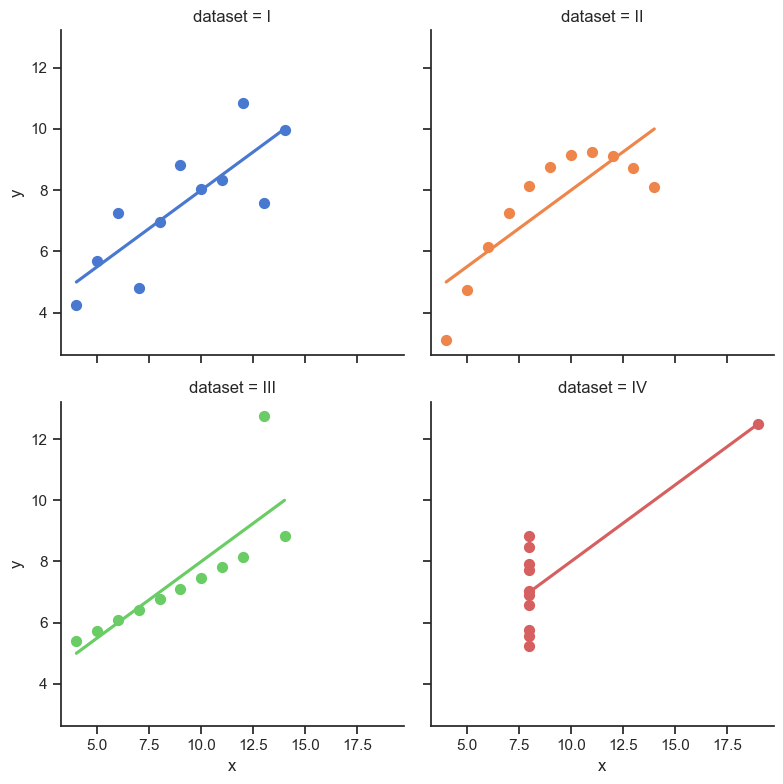

In [90]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [91]:
import matplotlib.pyplot as plt 
import numpy as np 

In [92]:
notas.head(2)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [93]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [94]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43
0.8348591407114047 0.8817134921476455


In [95]:
print("Nota mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_do_jumanji.nota.median()) 

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [45]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [46]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1debe446790>,
 'caps': [<matplotlib.lines.Line2D at 0x1debe447b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1debe445f10>,
 'medians': [<matplotlib.lines.Line2D at 0x1debe454d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1debe358510>,
 'means': []}

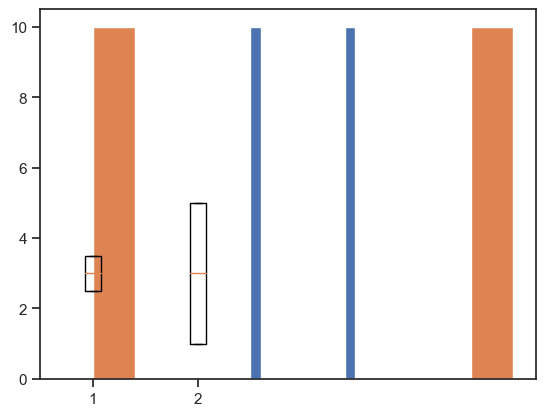

In [47]:
plt.hist(filme1)
plt.hist(filme2)

plt.boxplot([filme1, filme2])


{'whiskers': [<matplotlib.lines.Line2D at 0x1be23cc4e90>,
 'caps': [<matplotlib.lines.Line2D at 0x1be23cf6050>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be23cd25d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1be23cf7490>,
 'fliers': [<matplotlib.lines.Line2D at 0x1be23cb7bd0>,
 'means': []}

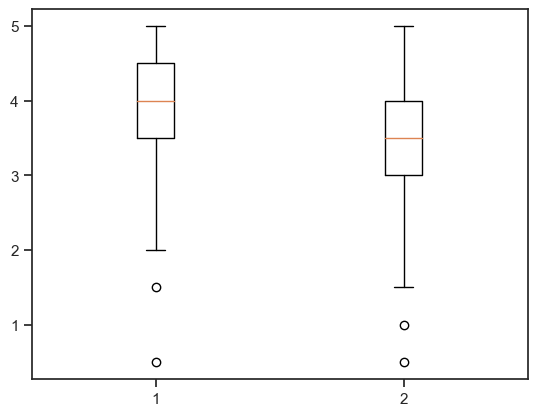

In [104]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<AxesSubplot: xlabel='filmeId', ylabel='nota'>

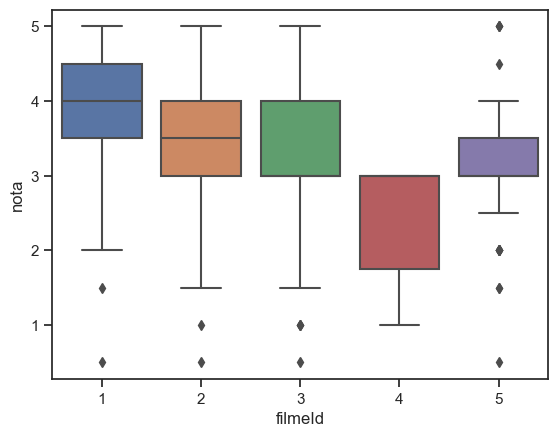

In [96]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2,3,4,5]"))